In [3]:
from IPython.display import display
from skimage.filters import threshold_otsu
from skimage import feature, morphology
from PIL import Image
import numpy as np
import cv2
import os
import numpy as np
from scipy.ndimage import label, binary_fill_holes, morphology
from skimage.measure import regionprops
from skimage.morphology import medial_axis
from skimage.util import invert
from skimage.io import imread
import matplotlib.pyplot as plt
from skimage import measure, morphology
%load_ext autoreload
%autoreload 2

imgPath = os.path.join('..', 'textures', 'map.png')
imgSize = (300, 300)


def show(img):
    pil_image2 = Image.fromarray(img)
    display(pil_image2)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


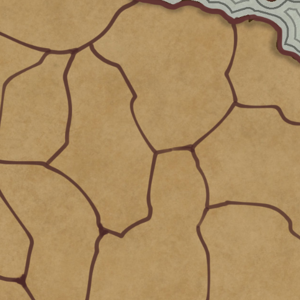

In [4]:
image = Image.open(imgPath).resize(imgSize)
display(image)

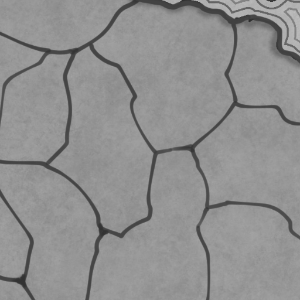

In [5]:
image = cv2.imread(imgPath)
image = cv2.resize(image, imgSize)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
show(gray)

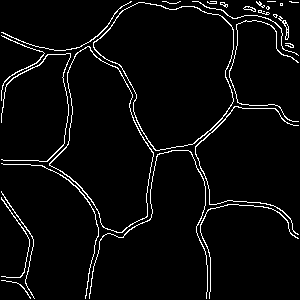

In [6]:
_, thresholded = cv2.threshold(gray, 100, 255, cv2.THRESH_BINARY)
edges = feature.canny(thresholded, sigma=1)
show(edges)

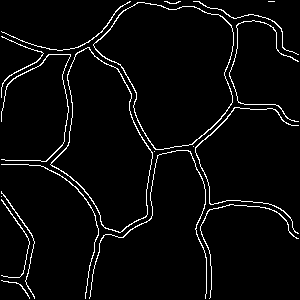

In [7]:
_, thresholded = cv2.threshold(gray, 95, 255, cv2.THRESH_BINARY)
edges = feature.canny(thresholded, sigma=2)
show(edges)

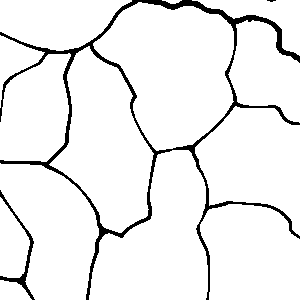

In [8]:
_, thresholded = cv2.threshold(gray, 95, 255, cv2.THRESH_BINARY)
show(thresholded)

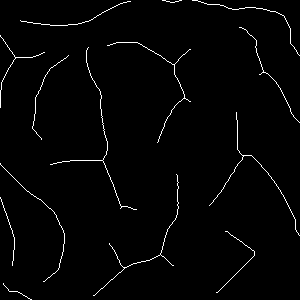

In [9]:
_, edges = cv2.threshold(gray, 95, 255, cv2.THRESH_BINARY)
edges = morphology.thin(edges)
show(edges)

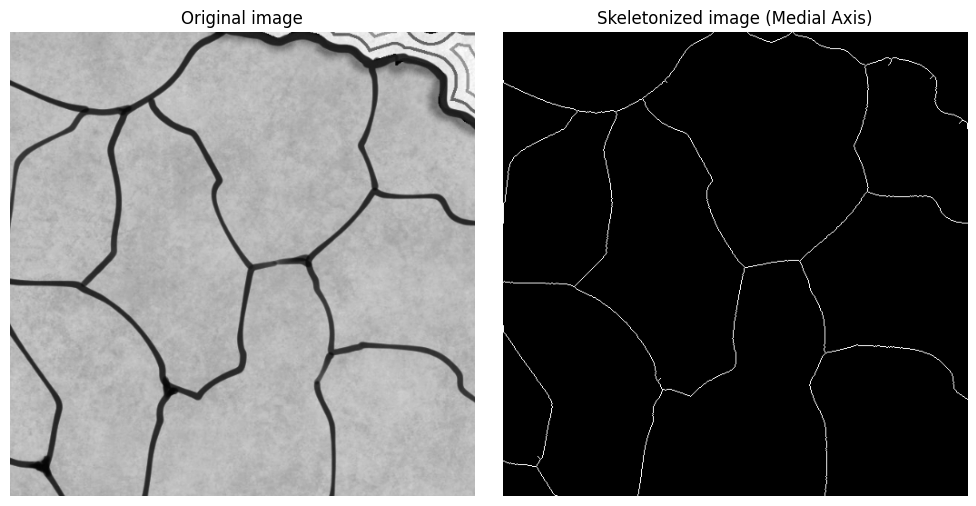

In [10]:
image = imread(imgPath, as_gray=True)
binary_image = image > 0.37  # This might change depending on your image
binary_image = invert(binary_image)

skeleton, distance = medial_axis(binary_image, return_distance=True)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5),
                         sharex=True, sharey=True)

ax = axes.ravel()
ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title('Original image')

ax[1].imshow(skeleton, cmap=plt.cm.gray)
ax[1].set_title('Skeletonized image (Medial Axis)')

for a in ax:
    a.axis('off')

plt.tight_layout()
plt.show()

Detected 1 figures
Background label: 1
Detected 0 holes in the main figure


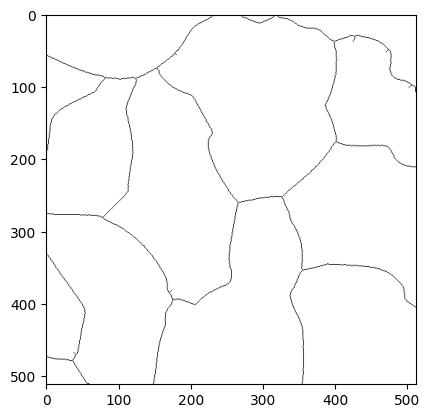

In [11]:
skeleton_inverted = np.invert(skeleton)

labels = measure.label(skeleton_inverted)

n_figures = labels.max()
print(f"Detected {n_figures} figures")

sizes = np.bincount(labels.ravel())

background_label = sizes.argmax()
print(f"Background label: {background_label}")

n_holes = n_figures - 1
print(f"Detected {n_holes} holes in the main figure")

filled_figure = np.where(labels == background_label, 1, 0)

plt.imshow(filled_figure, cmap='gray')
plt.show()

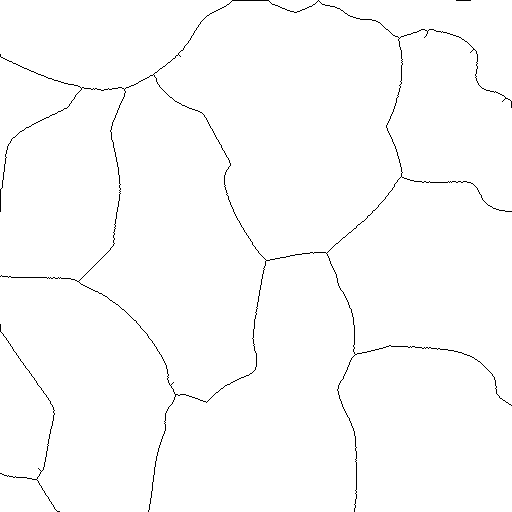

NameError: name 'skeleton_closed' is not defined

In [12]:
from skimage.morphology import binary_closing
figure = (skeleton == False)

# Apply a morphological closing operation to close small gaps
closed_figure = binary_closing(figure)
show(figure)

# Create a new array that is True where the figure is
figure = (skeleton_closed == False)
show(figure)

# Use binary_fill_holes to identify the holes
filled_figure = binary_fill_holes(figure)

# The holes are what is in the filled figure but not in the original figure
holes = filled_figure & ~figure

# Label the distinct holes
labeled_holes, num_holes = label(holes)

# Filter out small holes
regions = regionprops(labeled_holes)
hole_areas = [r.area for r in regions]
min_hole_area = 50  # Set a minimum hole area, adjust as needed
large_holes_labels = [i+1 for i, area in enumerate(hole_areas) if area > min_hole_area]
large_holes = np.isin(labeled_holes, large_holes_labels)


# Count the number of large holes
num_large_holes = np.unique(labeled_holes[large_holes]).size
print(f"Number of large holes: {num_large_holes}")

# Fill the holes by combining the figure and the holes
filled_figure = figure | large_holes
show(large_holes)
show(figure)
# Display the filled figure
plt.imshow(filled_figure, cmap='gray')
plt.show()


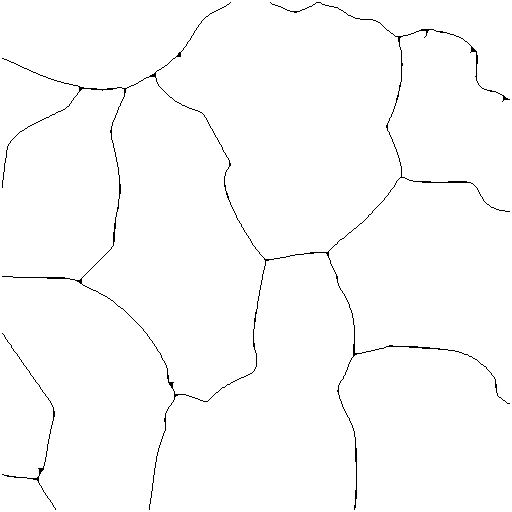

Number of closed areas: 2


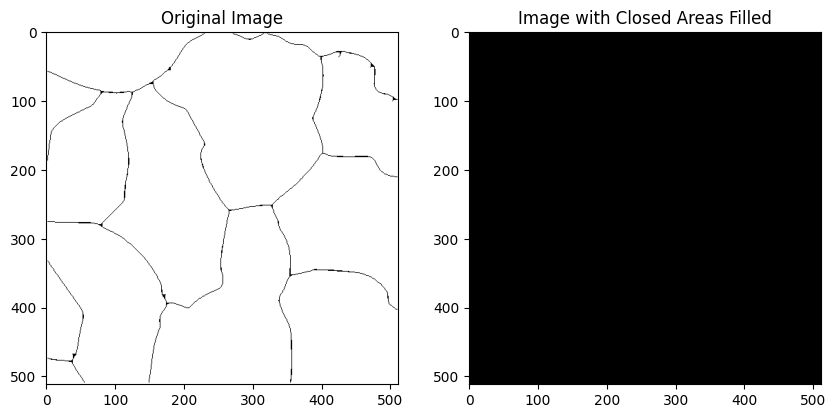

In [74]:
import numpy as np
from scipy import ndimage as ndi
import matplotlib.pyplot as plt

show(figure)
labeled_image, num_features = ndi.label(figure)  # ~ operator is used to invert the binary image

print(f"Number of closed areas: {num_features}")

filled_image = ndi.binary_fill_holes(figure)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(figure, cmap='gray')
axes[0].set_title('Original Image')
axes[1].imshow(filled_image, cmap='gray')
axes[1].set_title('Image with Closed Areas Filled')
plt.show()


In [ ]:
figure = invert(skeleton_inverted)
show(figure)

# Connected component analysis to label different parts of the skeleton
skeleton_uint8 = (figure * 255).astype(np.uint8)
toto = cv2.bitwise_not(skeleton_uint8)
show(toto)

# Define the structuring element
kernel = np.ones((3,3), np.uint8)

# Erode the image
skeleton_eroded = cv2.erode(skeleton_uint8, kernel, iterations=1)

# Apply connectedComponents
num_labels, labels_im = cv2.connectedComponents(skeleton_eroded)
show(skeleton_eroded)
print(f"Number of labels: {num_labels}")

num_labels, labels_im = cv2.connectedComponents(toto)
print(f"Number of labels: {num_labels}")

# Create an RGB image to store colored version
colored_image = np.zeros((*skeleton_uint8.shape, 3), dtype=np.uint8)

# Generate different colors (excluding black)
colors = np.random.randint(1, 255, size=(num_labels, 3))

# Color each label with a different color
for label in range(1, num_labels):
    colored_image[labels_im == label] = colors[label]

# Display the colored image
plt.imshow(colored_image)
plt.show()

from skimage.measure import label

# Ensure your data is boolean type
skeleton_bool = skeleton_uint8.astype(bool)

# Use the label function from scikit-image
labels_im = label(skeleton_bool)

# Get the number of labels (subtract 1 to ignore the background label)
num_labels = labels_im.max()

print(f"Number of labels: {num_labels}")


In [14]:
image = cv2.imread(imgPath, 0)

# Threshold the image - this will produce a binary image
_, thresh = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

# Find the contours. Contours are defined as the line joining all the points along the boundary of an image
# that are having the same intensity. 'contours' is a Python list of all the contours in the image.
contours, _ = cv2.findContours(
    thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Print the number of closed contours
print('Number of closed areas:', len(contours))


Number of closed areas: 17


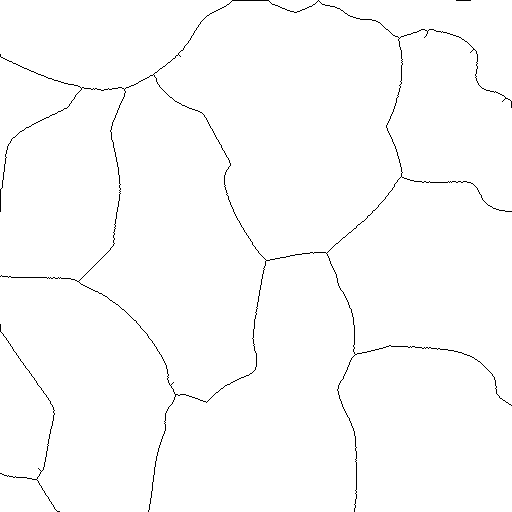

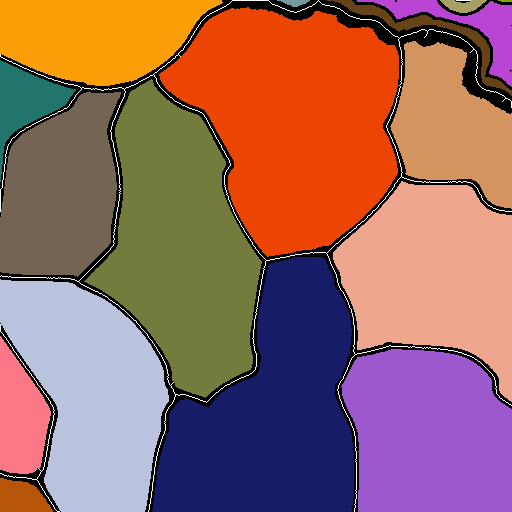

In [13]:
figure = invert(skeleton_inverted)
show(invert(skeleton))
# Convert skeleton into an image
skeleton_uint8 = (figure * 255).astype(np.uint8)
image = cv2.imread(imgPath, 0)


# Threshold the image
_, thresh = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

# Find contours
contours, _ = cv2.findContours(
    thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Make a copy of the image
filled_image = cv2.cvtColor(skeleton_uint8, cv2.COLOR_GRAY2BGR)

# Loop over each contour
for i, contour in enumerate(contours):
    # Create a random color
    color = (np.random.randint(0, 255), np.random.randint(
        0, 255), np.random.randint(0, 255))

    # Draw the filled contour on the copied image
    cv2.drawContours(filled_image, contours, i, color, -1)

    # Display the image
show(filled_image)


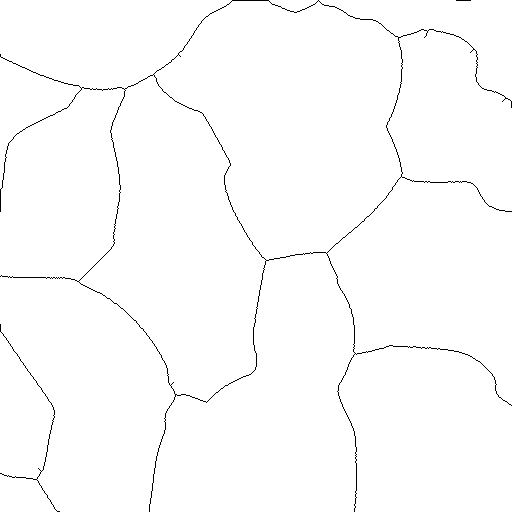

: 

: 

In [ ]:
image = invert(skeleton)
show(image)
image = (figure * 255).astype(np.uint8)
# Threshold the image
_, thresh = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

 # Find contours
contours, _ = cv2.findContours(
      thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

  # Create a blank image to store the filled areas
filled_image = np.zeros_like(image)

   # Loop over each contour
for i, contour in enumerate(contours):
        # Create a mask for the current contour
        mask = np.zeros_like(image)
        cv2.drawContours(mask, contours, i, 255, -1)

        # Find the skeleton points within the contour
        skeleton_points = cv2.bitwise_and(image, mask)

        # Fill the skeleton points with a color
        color = (np.random.randint(0, 255), np.random.randint(
            0, 255), np.random.randint(0, 255))
        filled_image = cv2.bitwise_or(filled_image, cv2.cvtColor(
            skeleton_points, cv2.COLOR_GRAY2BGR), mask=mask)

    # Display the image
show(filled_image)

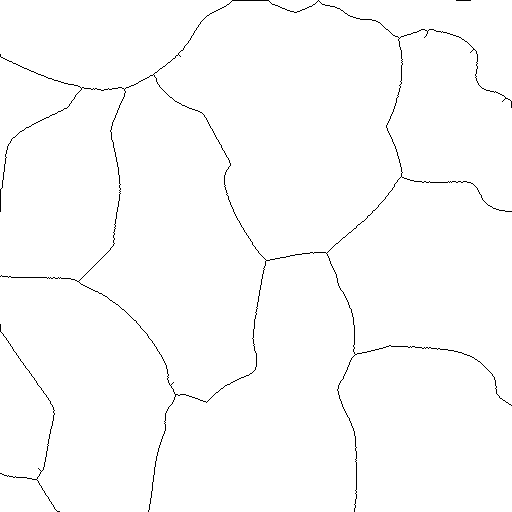

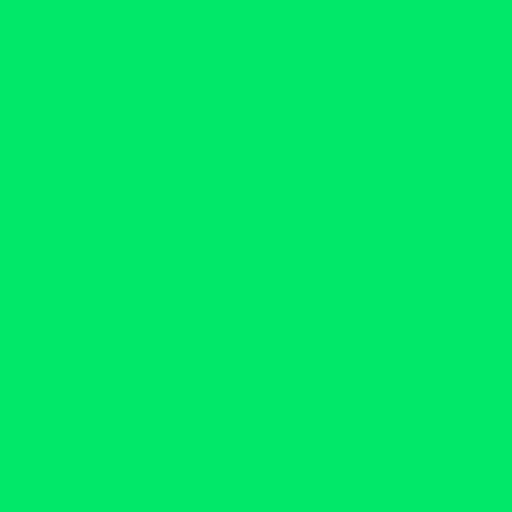

In [17]:
image = invert(skeleton)
show(image)
image = (image * 255).astype(np.uint8)
image = cv2.imread(imgPath, 0)

# # Threshold the image
_, thresh = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

# Find contours
contours, _ = cv2.findContours(
    image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Create a blank image to store the filled areas
filled_image = np.zeros(
    (image.shape[0], image.shape[1], 3), dtype=np.uint8)

# Loop over each contour
for i, contour in enumerate(contours):
    # Generate a random color for each contour
    color = np.random.randint(0, 256, size=3).tolist()

    # Fill the contour with the random color
    cv2.drawContours(filled_image, [contour], 0, color, -1)

# Display the image


# Display the image
show(filled_image)
